## Plot a fits image with contours 

download a fits file from ASTRON LoTSS DR2 page 

 


In [1]:
from astropy.io import fits
lofar_fname = '../../../Extragalaktik_WS2021/LabCourse/P015+19_mosaic-blanked.fits'

hdu = fits.open(lofar_fname)

print( repr(hdu[0].header) )

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 9394                                                  
NAXIS2  =                 9394                                                  
WCSAXES =                    2                                                  
CTYPE1  = 'RA---SIN'                                                            
CTYPE2  = 'DEC--SIN'                                                            
CUNIT1  = 'deg     '                                                            
CUNIT2  = 'deg     '                                                            
CRPIX1  =                 4697                                                  
CRPIX2  =                 4697                                                  
CRVAL1  =              15.82

### plot a fits image with python


see 
   
   https://docs.astropy.org/en/stable/visualization/wcsaxes/index.html
    
    

Here we want to do the following:
  * open a fits file containing an image 
  * extract the part of the image to be plotted
  * plot the extracted images with celestrial coordinates
  
 
A crucial element is the World Coordinate System
  * in the header of the fits file there is all information which allows to map pixels in the file to celestrial coordinates 
  * the astro.wcs module allows us to handle this information 
  
    

In [3]:
from astropy.io import fits
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord

# the data 
lofar_fname = '../../../Extragalaktik_WS2021/LabCourse/P015+19_mosaic-blanked.fits'

# open the LOFAR fits file
#   note the [0], it is necessary the fits file could contain multiple images or entries 
lofar = fits.open(lofar_fname)[0]      
print(repr(lofar.header))

# the WCS allows us to handle the transformation from pixel coordinates to celestrial coordinates 
#  example:
#     use the wcs_lofar to convert pixel coordinates to celestrial coordinates
wcs_lofar = WCS( lofar.header, naxis=2 )
p2w = wcs_lofar.pixel_to_world ( 5044, 6325 )
print( p2w.to_string('hmsdms') )
w2p = wcs_lofar.world_to_pixel ( SkyCoord( "01h03m53.5s +19d15m55.0s" ) )
print( w2p[0], w2p[1] )

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 9394                                                  
NAXIS2  =                 9394                                                  
WCSAXES =                    2                                                  
CTYPE1  = 'RA---SIN'                                                            
CTYPE2  = 'DEC--SIN'                                                            
CUNIT1  = 'deg     '                                                            
CUNIT2  = 'deg     '                                                            
CRPIX1  =                 4697                                                  
CRPIX2  =                 4697                                                  
CRVAL1  =              15.82

### create a cutout 

The LOFAR fits image large, we want to plot only the region of a galaxy

To this end we create a cutout, i.e. is pixel matrix which is smaller than the original file 

NOTE, in this cutout the pixels representing the galaxy of interest have new coordinates, therefore *** the WCS needs to be updated ***

4354.536324716369 6502.997266024086
w2p (array(4354.53632472), array(6502.99726602))
WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---SIN'  'DEC--SIN'  
CRVAL : 15.8222  18.5124  
CRPIX : 392.0  -1756.0  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00041666666666666  0.000416666666666666  
NAXIS : 100  100
<SkyCoord (ICRS): (ra, dec) in deg
    (15.97291667, 19.26527778)>


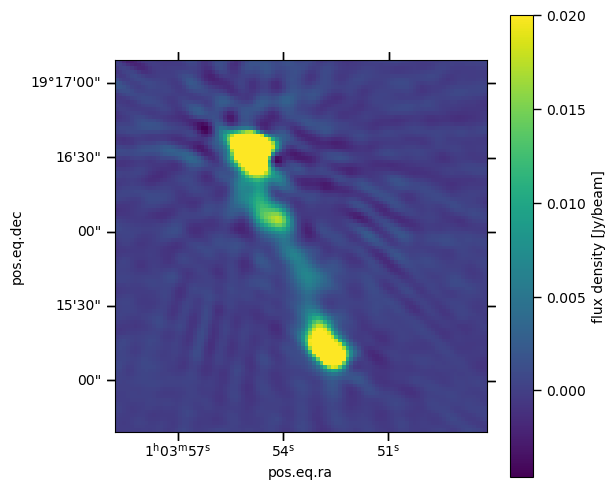

In [7]:
from astropy.io import fits
from astropy.wcs import WCS
from astropy.nddata import Cutout2D
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord

lofar_fname = '../../../Extragalaktik_WS2021/LabCourse/P015+19_mosaic-blanked.fits'
lofar = fits.open(lofar_fname)[0]

wcs_lofar = WCS( lofar.header, naxis=2  )

w2p = wcs_lofar.world_to_pixel ( SkyCoord( "01h03m53.5s +19d15m55.0s" ) )
print( w2p[0], w2p[1] )

# approximate center of radio galaxy of interest (from visual inspection with ds9)
#   coCenter : the central position of cutout (in pixel coordinates of original image)
#   coSize : the size of the cutout in pixels 
#   note : the cutout comes with a modified WCS (CRPIX has changed)
coCenter = wcs_lofar.world_to_pixel ( SkyCoord( "01h03m53.5s +19d15m55.0s" ) ) 
coSize   = 100 
print( 'w2p', repr(w2p))
cutout   = Cutout2D(lofar.data, w2p, (coSize,coSize), wcs=wcs_lofar ) 
print( cutout.wcs )

print( SkyCoord( "01h03m53.5s +19d15m55.0s" ) )

# plot the cutout 
ax = plt.subplot( projection=cutout.wcs )
im = ax.imshow( cutout.data, origin='lower', vmax=0.02 )
plt.colorbar(im, label='flux density [Jy/beam]')


### Coutour lines

We would like to overplot the radio image with countour lines, which can be used later together with an sdss image

In [1]:
import numpy as np
rms    = 5e-4            # the noise level in the image cutout (rougly)
lc     = 5.0 * rms       # lowest contour level
sep    = np.sqrt(4.0)    # separation of contour levels
levels = [ sep**x * lc for x in range(12)]   # generates a sequence of contour levels
print(levels)
plt.clf()
fig = plt.figure( figsize=(10, 9) )
ax = plt.subplot( projection=cutout.wcs )
im = ax.imshow( cutout.data, origin='lower', vmax=0.01 )
plt.colorbar(im, label='flux density [Jy/beam]')
co = ax.contour( cutout.data, levels=levels, colors='red' )

[0.0025, 0.005, 0.01, 0.02, 0.04, 0.08, 0.16, 0.32, 0.64, 1.28, 2.56, 5.12]


NameError: name 'plt' is not defined

### Flux density measurement

measure the flux density of the radio source and compute the intrinsic radio luminosity of the source

 *  adjust a region with shape polygon in ds9, corners can be moved, added 

 *  $F_{\nu, {\rm integrated}} =  \int_{\rm area\,of\,interest}  F_\nu \,  {\rm d}A $

 *  the flux density ('density' refers to per frequency intervall) is given in Jy / beam

 * the 'sum' in Region/Get Information/Analysis/Statistics' takes the sum over pixels

 *  we need to convert the beam to pixels

 * $ F_{\nu, {\rm integrated}} =  \ln(2)  \frac{ \pi } {4}  \times  {\tt sum} \times \frac{ \tt CDELT1 \, CDELT2 }{ \tt BMAJ \, BMIN }  $ 

### Compare to NVSS and FIRST

LOFAR observations are taken at aboyt 150 MHz, DR2 images have a beam size of about 6 arcsec. It might be useful to compare the LOFAR results to images taken at other frequencies, e.g. NVSS at 1.4 GHz and FIRST at 3 GHz

*  https://www.cv.nrao.edu/nvss/postage.shtml

*  https://third.ucllnl.org/cgi-bin/firstcutout
    

### You can cross check your source on NED

Enter the source position in NED and check if the source is known and what information is available

 * http://ned.ipac.caltech.edu

### Use SDSS positions of sources with spectra to create a region file for ds9

We would like to have some radio sources for which the radio emission can be analyzed together with SDSS spectra (e.g. to determine the redshift and to assess which AGN type it is). For many radio sources no SDSS are available and, vice versa, many AGN with SDSS spectra do not show radio emission. To find sources with both information we can show SDSS sources with spectra as regions in ds9.
 * determine the center of the LOFAR pointing
 * uses the SDSS interface to get all position of sources with spectra in the field of view of the LOFAR pointing (roughly 110 arcmin radius). You can select all objects with spectra or select galaxies or quasars 
 * after 'Submit Query to Image List' you can copy the list of positions to sdsspos.txt
 * run the script below
 * open the LOFAR pointing in ds9 and load the region.reg in Regions

In [7]:
from astropy.coordinates import SkyCoord
sc_CygA_str = "12h46m12.0s +49d40m00.0s"
sc_CygA = SkyCoord( sc_CygA_str )
print(sc_CygA) 

<SkyCoord (ICRS): (ra, dec) in deg
    (191.55, 49.66666667)>


In [6]:
from astropy import units as u
from astropy.coordinates import Angle

def isfloat(num):
    try:
        float(num)
        return True
    except ValueError:
        return False

fp = open( 'region.reg', 'w' )
for line in open('sdsspos.txt') :
    token = line.strip('\n').split(',')
    if len(token) > 2  and isfloat(token[1]) and isfloat(token[2]):
        ra, dec = Angle(token[1]+'d'), Angle(token[2]+'d') 
        print( "j2000; circle", ra.to_string(unit=u.hour, sep=':'),  dec.to_string(unit=u.degree, sep=':'),  "0.2'", file=fp  )
fp.close()

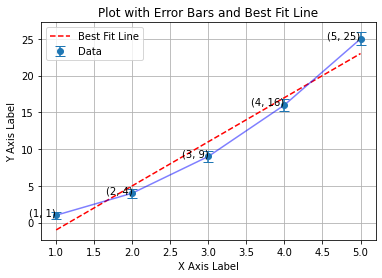

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

# Sample data
x = np.array([1, 2, 3, 4, 5])
y = np.array([1, 4, 9, 16, 25])
errors = np.array([0.5, 0.6, 0.7, 0.8, 0.9])  # Sample standard errors

# Plotting
plt.errorbar(x, y, yerr=errors, fmt='o', label='Data', capsize=5)

# Display coordinates for each data point
for i, (x_val, y_val) in enumerate(zip(x, y)):
    plt.text(x_val, y_val, f'({x_val}, {y_val})', ha='right')

# Fit a line using linear regression
slope, intercept, _, _, _ = linregress(x, y)
best_fit_line = slope * x + intercept
plt.plot(x, best_fit_line, color='red', linestyle='--', label='Best Fit Line')

# Connect the data points with a line
plt.plot(x, y, linestyle='-', color='blue', alpha=0.5)

plt.xlabel('X Axis Label')
plt.ylabel('Y Axis Label')
plt.title('Plot with Error Bars and Best Fit Line')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# Sample data
x = np.array([1, 2, 3, 4, 5])
y = np.array([1, 4, 9, 16, 25])
errors = np.array([0.5, 0.6, 0.7, 0.8, 0.9])  # Sample standard errors

# Exponential function to fit
def exponential_func(x, a, b):
    return a * np.exp(b * x)

# Perform exponential curve fitting
popt, pcov = curve_fit(exponential_func, x, y)

# Plotting
plt.errorbar(x, y, yerr=errors, fmt='o', label='Data', capsize=5)

# Display coordinates for each data point
for i, (x_val, y_val) in enumerate(zip(x, y)):
    plt.text(x_val, y_val, f'({x_val}, {y_val})', ha='right')

# Plot the fitted exponential curve
x_fit = np.linspace(min(x), max(x), 100)
plt.plot(x_fit, exponential_func(x_fit, *popt), color='red', linestyle='--', label='Exponential Fit')

plt.xlabel('X Axis Label')
plt.ylabel('Y Axis Label')
plt.title('Plot with Error Bars and Exponential Fit')
plt.legend()
plt.grid(True)
plt.show()
